In [1]:
import datetime
import ipywidgets as wg
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display,clear_output
import os 
import pandas as pd
from matplotlib import pylab as plt 
import csv
import numpy as np
%matplotlib inline

## INPUT

In [2]:
%%time
input_file = "InStream8459672526.csv"
df = pd.read_csv(input_file)
df_buff = pd.read_csv(input_file)

CPU times: user 57.8 ms, sys: 6.83 ms, total: 64.6 ms
Wall time: 99.4 ms


## Column's name

In [3]:
print df.head()

   flow                        id  pressure                      time
0   0.0  5cff936e8bc2845b71510df6     69.32  2019-06-11T07:42:00.235Z
1   0.0  5cff936f8bc2845b71510e17     69.56  2019-06-11T07:42:01.673Z
2   0.0  5cff936e8bc2845b71510e07     69.57  2019-06-11T07:42:01.959Z
3   0.0  5cff93708bc2845b71510e2a     69.45  2019-06-11T07:42:02.387Z
4   0.0  5cff93718bc2845b71510e3b     69.69  2019-06-11T07:42:03.103Z


## Piece of table

In [4]:
min_value = wg.IntSlider(min = 0,max = len(df)-1,step = 1,value = 0,description='min_val')
max_value = wg.IntSlider(min = 1,max = len(df),step = 1,value = 1,description='max_val')

chbx_flow = wg.Checkbox(value=False,description= 'flow',disabled=False)
chbx_id = wg.Checkbox(value=False,description= 'id',disabled=False)
chbx_time = wg.Checkbox(value=False,description= 'time',disabled=False)
chbx_pressure = wg.Checkbox(value=False,description= 'pressure',disabled=False)

settings = wg.HBox([chbx_flow,chbx_id,chbx_time,chbx_pressure])
sliders_layout = wg.VBox([min_value,max_value])

button = wg.Button(description = 'START!',disabled=False)

accordion = wg.Accordion(children = [sliders_layout,settings])
accordion.set_title(0,'Sliders')
accordion.set_title(1,'Settings')

mainLay = wg.VBox([accordion,button])
    
def on_button_click(b):
    if chbx_flow.value:
        if not 'flow' in df.columns:
            print ('Sorry!But this Df has not this column')
        else:
            del df['flow']
    else:
        if not 'flow' in df.columns:
            df.insert(0,'flow',df_buff['flow'])
#====================================================================           
    if chbx_id.value:
        if not 'id' in df.columns:
            print ('Sorry!But this Df has not this column')
        else:
            del df['id']
    else:
        if not 'id' in df.columns:
            df.insert(0,'id',df_buff['id'])
#=======================================================================
    if chbx_time.value:
        if not 'time' in df.columns:
            print ('Sorry!But this Df has not this column')
        else:
            del df['time']
    else:
        if not 'time' in df.columns:
            df.insert(0,'time',df_buff['time'])
#========================================================================
    if chbx_pressure.value:
        if not 'pressure' in df.columns:
            print ('Sorry!But this Df has not this column')
        else:
            del df['pressure']
    else:
        if not 'pressure' in df.columns:
            df.insert(0,'pressure',df_buff['pressure'])
            
    clear_output()
    display(mainLay)
    print df[min_value.value:max_value.value]
            
button.on_click(on_button_click)
display(mainLay)
#TODO:Убрать False с условий, доделать добавление столбцов по 'False' P.S !Сделано!

VkJveChjaGlsZHJlbj0oQWNjb3JkaW9uKGNoaWxkcmVuPShWQm94KGNoaWxkcmVuPShJbnRTbGlkZXIodmFsdWU9MjU1LCBkZXNjcmlwdGlvbj11J21pbl92YWwnLCBtYXg9MTk4MCksIEludFPigKY=


                           id  pressure                      time
255  5cff94398bc2845b71512095     70.10  2019-06-11T07:45:23.552Z
256  5cff94388bc2845b71512083     70.65  2019-06-11T07:45:23.796Z
257  5cff943a8bc2845b715120a7     69.95  2019-06-11T07:45:24.278Z
258  5cff943b8bc2845b715120b7     70.69  2019-06-11T07:45:25.005Z
259  5cff943c8bc2845b715120de     70.71  2019-06-11T07:45:26.599Z
260  5cff943b8bc2845b715120cb     70.76  2019-06-11T07:45:26.781Z
261  5cff943d8bc2845b715120f2     70.18  2019-06-11T07:45:27.430Z
262  5cff943e8bc2845b71512101     70.92  2019-06-11T07:45:28.217Z
263  5cff943f8bc2845b71512124     70.81  2019-06-11T07:45:29.646Z
264  5cff943e8bc2845b71512112     70.53  2019-06-11T07:45:29.931Z
265  5cff94408bc2845b71512135     70.80  2019-06-11T07:45:30.359Z
266  5cff94418bc2845b71512145     70.50  2019-06-11T07:45:31.085Z
267  5cff94438bc2845b7151217e     70.57  2019-06-11T07:45:32.641Z
268  5cff94448bc2845b71512192     70.29  2019-06-11T07:45:34.393Z
269  5cff9

## Drawing graphs

VkJveChjaGlsZHJlbj0oSEJveChjaGlsZHJlbj0oSW50U2xpZGVyKHZhbHVlPTUyOCwgZGVzY3JpcHRpb249dSdTY2FsZScsIG1heD0xOTgxLCBtaW49MSksIENoZWNrYm94KHZhbHVlPVRydWXigKY=


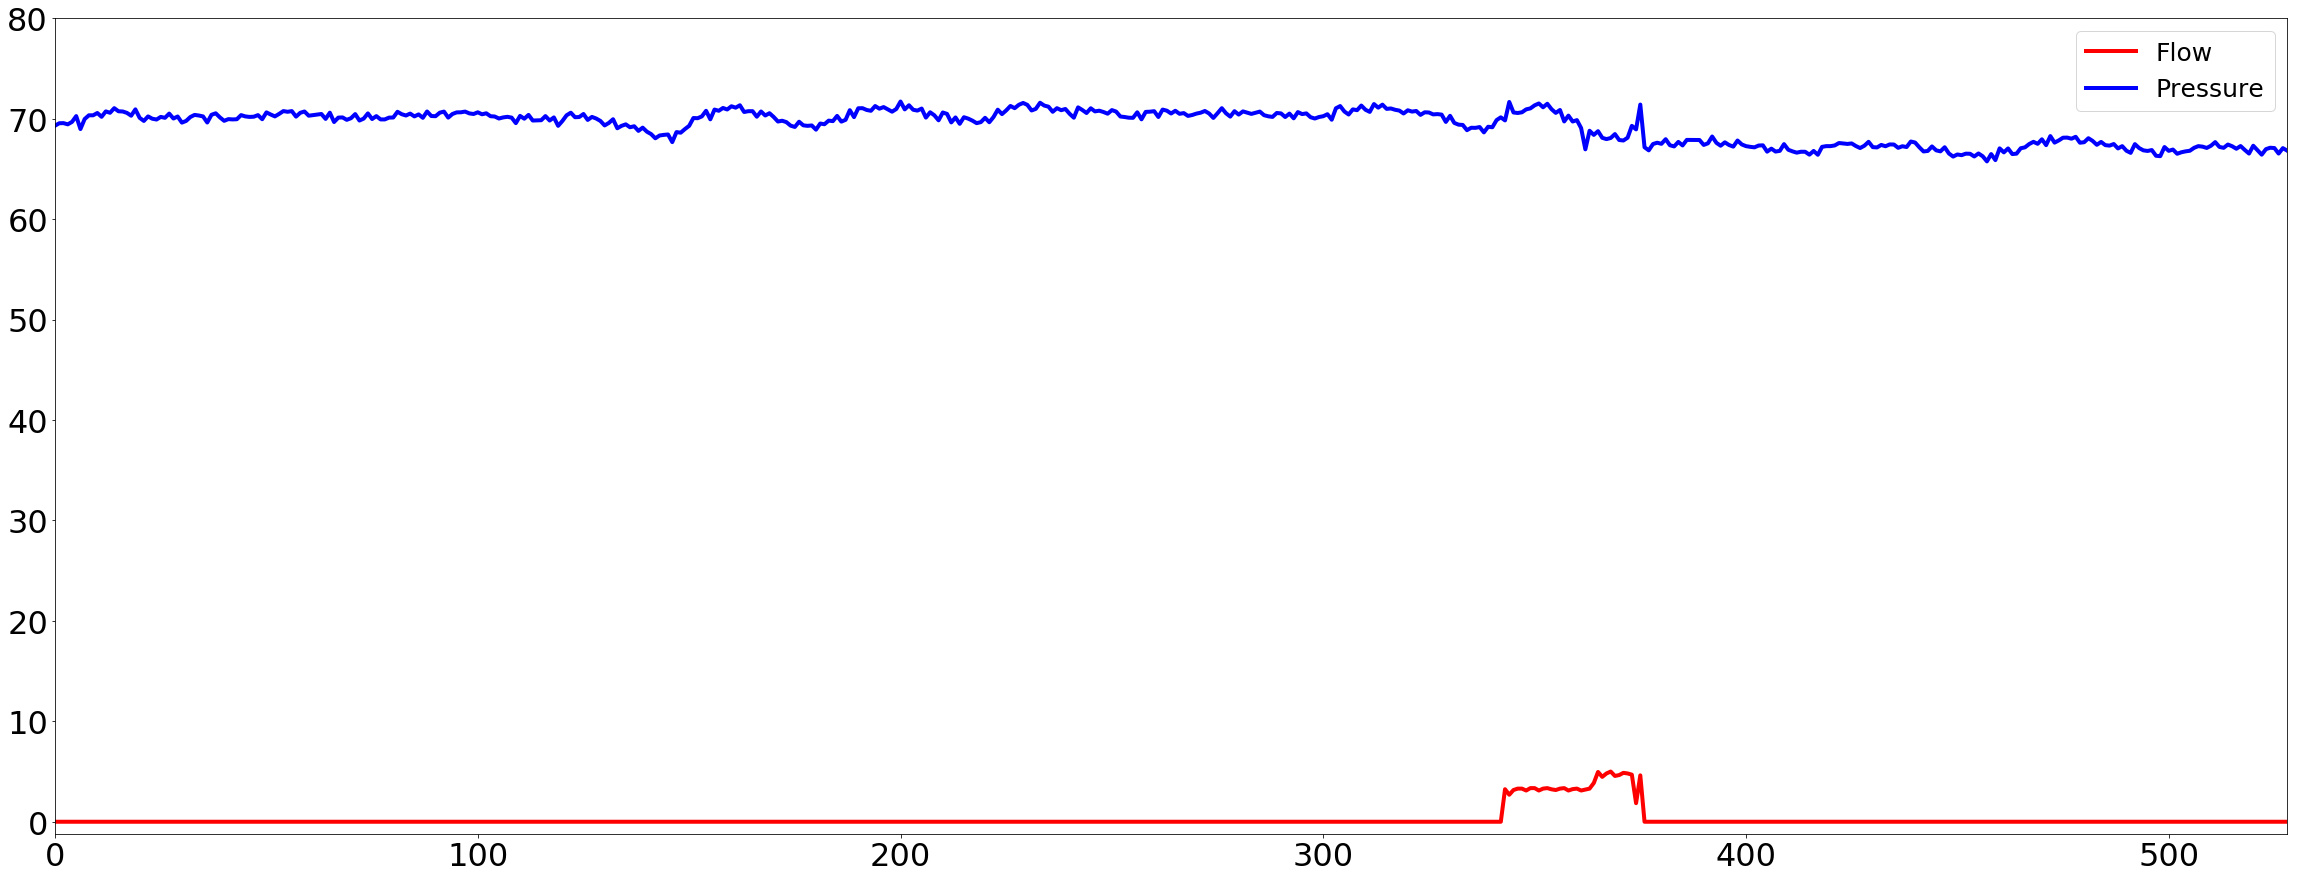

In [5]:
scale = wg.IntSlider(min = 1,max = len(df),step = 1,value = 1,description='Scale')
chbx_flow_chart = wg.Checkbox(value=False,description= 'flow',disabled=False)
chbx_pressure_chart = wg.Checkbox(value=False,description= 'pressure',disabled=False)
button_start = wg.Button(description = 'START!',disabled=False)

widgets = wg.HBox([scale,chbx_pressure_chart,chbx_flow_chart])
main_layout = wg.VBox([widgets,button_start])


def on_button_clicked(b):
    clear_output()
    display(main_layout)
        
    plt.figure(figsize = (40, 15))
    plt.axis([0,scale.value, -1.2, 80])
    plt.tick_params(axis ='both',which ='major',labelsize = 32)
    #ax.ticklabel_format(style ='sci',axis = 'both')
    
    if chbx_flow_chart.value:
        flow_chart = df_buff['flow']
        plt.plot(flow_chart, 'red', label="Flow", linewidth=4.0)
    if chbx_pressure_chart.value:
        pressure_chart = df_buff['pressure']
        plt.plot(pressure_chart, 'blue', label="Pressure", linewidth=4.0)
    plt.legend(loc='upper right', prop={'size': 25})
    plt.show()     

button_start.on_click(on_button_clicked)
display(main_layout)
#TODO: Доделать слайдер на масштаб по кол-ву элементов, чекбоксы по клику(отображение нужных графиков)